<a href="https://colab.research.google.com/github/Dpgofast/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [122]:
# TODO
import pandas as pd 
import numpy as np 

survive_url='http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
sur_df=pd.read_csv(survive_url,header=None) #assign data to dataframe
sur_df.shape                  #pull row and column count for verification 
sur_df.isnull().sum().sum()   #verify no missing or nan values
#now to name the features
col_names=['Age','OP Year','Positive axillary nodes','Survived 5 years post-op']
named_df=pd.read_csv(survive_url,header=None,names=col_names)  #names assigned 
named_df.head() #verify labels match data 

#now to encode the post_op column as binary
encode_list= {1:1,2:0}
named_df['Survived 5 years post-op']=named_df['Survived 5 years post-op'].map(encode_list)#replaces all #2's with zero
named_df.head()
  

,Age,OP Year,Positive axillary nodes,Survived 5 years post-op
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import matplotlib.pyplot as plt



In [0]:
#bin variables 
age_bin=pd.cut(named_df['Age'],3)
op_bin=pd.cut(named_df['OP Year'],3)
pan_bin=pd.cut(named_df['Positive axillary nodes'],2)



In [0]:
#assign columns to variable names for easier access
age=named_df['Age']
pan=named_df['Positive axillary nodes']
year=named_df['OP Year']
live=named_df['Survived 5 years post-op'

In [99]:
print(named_df.describe())

              Age     OP Year  Positive axillary nodes  \
count  306.000000  306.000000               306.000000   
mean    52.457516   62.852941                 4.026144   
std     10.803452    3.249405                 7.189654   
min     30.000000   58.000000                 0.000000   
25%     44.000000   60.000000                 0.000000   
50%     52.000000   63.000000                 1.000000   
75%     60.750000   65.750000                 4.000000   
max     83.000000   69.000000                52.000000   

       Survived 5 years post-op  
count                306.000000  
mean                   0.735294  
std                    0.441899  
min                    0.000000  
25%                    0.000000  
50%                    1.000000  
75%                    1.000000  
max                    1.000000  


In [100]:
ax=pd.crosstab([pan_bin,age_bin],live)
ax

Survived 5 years post-op                   0    1
Positive axillary nodes Age                      
(-0.052, 26.0]          (29.947, 47.667]  25   80
                        (47.667, 65.333]  43  115
                        (65.333, 83.0]    11   27
(26.0, 52.0]            (29.947, 47.667]   1    1
                        (47.667, 65.333]   1    2
                        (65.333, 83.0]     0    0

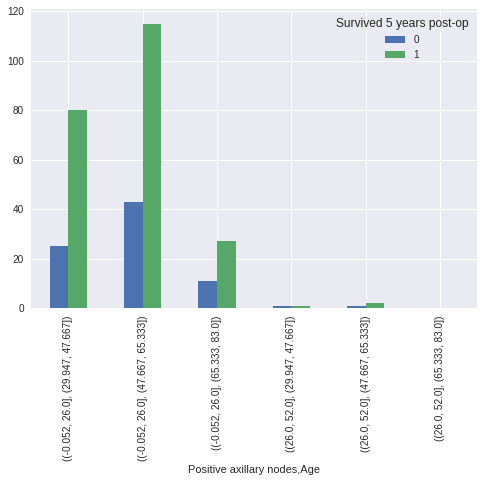

In [103]:
ax.plot.bar();

In [104]:
dx=pd.crosstab([op_bin,age_bin],live)
dx

Survived 5 years post-op            0   1
OP Year          Age                     
(57.989, 61.667] (29.947, 47.667]   7  36
                 (47.667, 65.333]  16  47
                 (65.333, 83.0]     5   6
(61.667, 65.333] (29.947, 47.667]  11  29
                 (47.667, 65.333]  20  39
                 (65.333, 83.0]     5   8
(65.333, 69.0]   (29.947, 47.667]   8  16
                 (47.667, 65.333]   8  31
                 (65.333, 83.0]     1  13

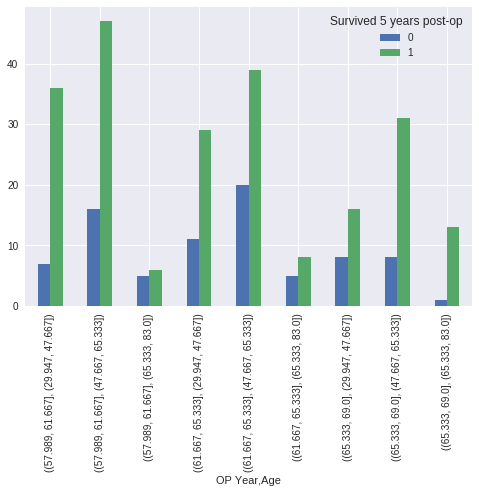

In [106]:
dx.plot.bar();

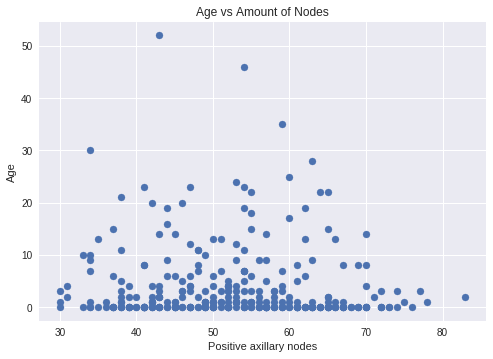

In [102]:
plt.scatter(age,pan)
plt.ylabel('Age')
plt.xlabel('Positive axillary nodes')
plt.title('Age vs Amount of Nodes');


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.
1. One feature that appears to have a positive correlation to survival is age, The lower age group seemed to have a higher survival rate. 

2. The feature i believe has a negative effect on survival is year of operation, it appears the latter years had higher long term survival rates. 

3.The correlation of age at operation and year of operation isnt obvious, but i believe the technology may have improved resulting in better odds of longterm survival. 